In [1]:
import zfit
from zfit import z
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import mplhep as hep
hep.set_style(hep.style.CMS)

from coffea.analysis_objects import JaggedCandidateArray
from coffea.util import load

In [2]:
###################### Jpsi peak fit ############################

# Crystal ball with left tail + exponential for background

# Data and histogram
data_path = "../output/test_plot/merged/test_plot_merged.coffea"
hist_path = "../output/test_plot/hist/hist_Dimu_mass.hist"

# Model definition: CrystalBall

# Mass observable
obs = zfit.Space('jpsi mass', (2.95, 3.25))

# Mean
mu = zfit.Parameter('mean', 3.09, 2.95, 3.15)

# Sigma gauss
sigma_gauss = zfit.Parameter('sigma gauss', 0.05, 0.0, 1.0)

# Sigma cb
sigma_cb = zfit.Parameter('sigma cb', 0.05, 0.0, 1.0)

# Alpha
alpha_sig = zfit.Parameter('alpha', 1.38, -100, 100)

# n signal
n_sig = zfit.Parameter('n_sig', 99, 0, 100)

# Gaussian pdf

gauss = zfit.pdf.Gauss(obs=obs, mu=mu, sigma=sigma_gauss)

# gauss yield
gauss_yield = zfit.Parameter('yield_gauss', 166706, 0, 1000000000, step_size=10)

# Extendend gauss pdf
gauss_ext = gauss.create_extended(gauss_yield)

# CB pdf
cryst_ball = zfit.pdf.CrystalBall(obs=obs, mu=mu, sigma=sigma_cb, alpha=alpha_sig, n=n_sig)

# cb yield
cryst_ball_yield = zfit.Parameter('yield_cryst_ball', 291261, 0, 1000000000, step_size=10)

# Extendend cryst_ball pdf
cryst_ball_ext = cryst_ball.create_extended(cryst_ball_yield)

#signal_ext = zfit.pdf.SumPDF([cryst_ball_yield, gauss_yield])
## Background definition: exponential

# Exponential factor
lambd = zfit.Parameter("lambda", -1.7, -5, -0.01)

# Background pdf
exponential = zfit.pdf.Exponential(lambd, obs=obs)

# Background yield
background_yield = zfit.Parameter('yield_back', 44425, 0, 1000000000, step_size=1)

# Extended pdf
background_ext = exponential.create_extended(background_yield)

## Model function: CrystalBall + Exponential

#model = zfit.pdf.SumPDF([signal_ext, background_ext])
model = zfit.pdf.SumPDF([gauss_ext, cryst_ball_ext, background_ext])
# Take data

data = load(data_path)
hist = load(hist_path)

mass_data = (data['Dimu'].get('__fast_mass'))._value

# Convert for zfit data format
datafit = zfit.Data.from_numpy(obs=obs, array=mass_data)

# plot the data
mass_data = data['Dimu']['__fast_mass'].value

# create NLL
nll = zfit.loss.ExtendedUnbinnedNLL(model=model, data=datafit)

# create a minimizer
minimizer = zfit.minimize.Minuit(use_minuit_grad=True)
result = minimizer.minimize(nll)

# do the error calculations, here with minos
param_erros, _ = result.errors(method='minuit_minos')

# plot the data
mass_data = data['Dimu']['__fast_mass'].value

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -7.014e+06                 │        Nfcn = 519 (519 total)        │
│ EDM = 0.00153 (Goal: 0.001)      │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: The function <function Space.area at 0x7f6b32423598> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('jpsi mass',), axes=None, limits=(array([[2.95]]), array([[3.25]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.


{<zfit.Parameter 'yield_gauss' floating=True value=1.669e+05>: {'value': 166878.12932458802,
  'minuit_minos': ┌──────────┬───────────────────────┐
│          │      yield_gauss      │
├──────────┼───────────┬───────────┤
│  Error   │   -4e3    │    5e3    │
│  Valid   │   False   │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘},
 <zfit.Parameter 'yield_cryst_ball' floating=True value=2.91e+05>: {'value': 291016.2532779315,
  'minuit_minos': ┌──────────┬───────────────────────┐
│          │   yield_cryst_ball    │
├──────────┼───────────┬───────────┤
│  Error   │   -4e3    │    4e3    │
│  Valid   │   False   │   False   │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘},
 <zfit.Parameter 'yield_back' floating=True value=4.45e+04>: {'value': 44501.222259019094,
  'minuit_mino

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


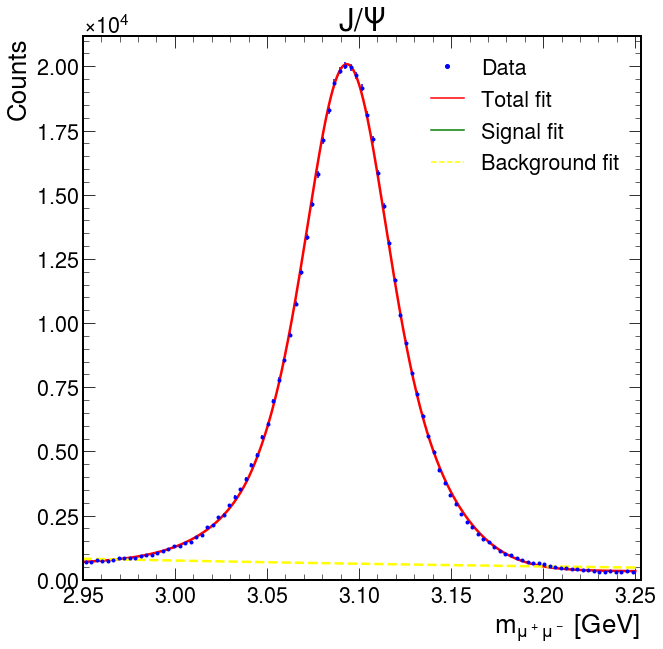

In [3]:
## Plots

plt.figure()
plt.title("$J/\Psi$")

# plot the data
ax = plt.gca()

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)

ax.set_xlim(hist.axes[0].edges[0], hist.axes[0].edges[-1] + hist.axes[0].widths[-1])
    
ax.set_xlabel(hist.axes[0].metadata, loc='right')
ax.set_ylabel("Counts", loc='top')

plt.errorbar(hist.axes[0].centers,
             hist.view(),
             yerr=np.sqrt(hist.view()),
             fmt='.',
             color='blue',)

mean = (hist.view() * hist.axes[0].centers).sum()/hist.sum()
std = np.sqrt((hist.view()*((hist.axes[0].centers - mean)**2)).sum()/hist.sum())
"""
annotation = f"Total {hist.sum()}" \
               + "\n" + f"Mean: {round(result.params[mu].get('value'),2)}" \
               + "\n" + f"Std: {round(result.params[sigma].get('value'),2)}"

ax.annotate(annotation, xy=(0.83, 0.45), xycoords='axes fraction', fontsize = "small",
               ha='center', annotation_clip=False, bbox=dict(boxstyle='round', fc='None')) 
               """
fig = ax.get_figure()

# Legend
data_legend = mlines.Line2D([], [], color='blue', marker='.',
                          markersize=8, linestyle='none', label='Data')
model_legend = mlines.Line2D([], [], color='red', label='Total fit')
signal_legend = mlines.Line2D([], [], color='green', label='Signal fit')
background_legend = mlines.Line2D([], [], color='yellow', label='Background fit', linestyle='--')

plt.legend(handles=[data_legend, model_legend, signal_legend, background_legend])

# Creates an array to plot the pdf values

# Model pdf
x_model = np.linspace(2.95, 3.25, 1000)
y_model = model.pdf(x_model).numpy()
# Signal pdf
#y_signal = signal_ext.pdf(x_model).numpy()
# Background pdf
y_back = background_ext.pdf(x_model).numpy()

# Take a guess 
n_sample = len(mass_data)
n_bins = 100
# Scale for the plot
plot_scaling = n_sample / n_bins * obs.area()

# Data plot
hep.histplot(hist, '.', ax=ax, linestyle='none', color='black')

# Model plot
plt.plot(x_model, y_model * plot_scaling, color='red', label="Model", linewidth=2.5)

# Signal plot
#plt.plot(x_model, y_signal*1000, color='green', label="CrystalBall", linewidth=2.5)

# Background plot
plt.plot(x_model, y_back*190, color='yellow', label="Exponential", linewidth=2.5, linestyle='--')

result.params

In [8]:
result.params

{<zfit.Parameter 'yield_gauss' floating=True value=1.667e+05>: {'value': 166706.31016563188,
  'minuit_minos': ┌──────────┬───────────────────────┐
│          │      yield_gauss      │
├──────────┼───────────┬───────────┤
│  Error   │   -5e3    │    5e3    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘},
 <zfit.Parameter 'yield_cryst_ball' floating=True value=2.913e+05>: {'value': 291261.15037747537,
  'minuit_minos': ┌──────────┬───────────────────────┐
│          │   yield_cryst_ball    │
├──────────┼───────────┬───────────┤
│  Error   │   -5e3    │    5e3    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘},
 <zfit.Parameter 'yield_back' floating=True value=4.443e+04>: {'value': 44425.81977071036,
  'minuit_mi

In [ ]:
###################### D* peak fit ############################

# Signal: two gaussians with the same mean

# Data and histogram
data_path = "../output/test_plot/merged/test_plot_merged.coffea"
hist_path = "../output/test_plot/hist/hist_Dstar_deltam.hist"

# Class for background function
class DstarBackPDF(zfit.pdf.ZPDF):
    """1-dimentional PDF implementing the phenomenological threshold function"""
    
    _PARAMS = ['p0', 'p1', 'p2']
    
    def _unnormalized_pdf(self, x):
        data = z.unstack_x(x)
        p0 = self.params['p0']
        p1 = self.params['p1']
        p2 = self.params['p2']
        
        mpi = 0.13957
        
        return (1 - z.exp(-(data-mpi)/(p0)))*(data/mpi)**p1 + p2 * (data/mpi - 1)
    
## Signal

# Gaussian 1

obs_dstar = zfit.Space('delta m mass', (0.14, 0.16))

# Mean 1
mu1 = zfit.Parameter('Mean dm 1', 0.1445, 0.14, 0.16)

# Error 1
sigma1 = zfit.Parameter('sigma dm 1', 0.001, 0.0, 1.0)

# PDF definition
gauss1 = zfit.pdf.Gauss(obs=obs_dstar, mu=mu1, sigma=sigma1)

gauss1_yield = zfit.Parameter('gauss1_yield', 400000, 0, 1000000000, step_size=10)

gauss1_ext = gauss1.create_extended(gauss1_yield)

# Gaussian 2

# Mean 2
mu2 = zfit.Parameter('Mean dm 2', 0.1445, 0.14, 0.16)

# Error 2
sigma2 = zfit.Parameter('sigma dm 2', 0.001, 0.0, 1.0)

# PDF definition
gauss2 = zfit.pdf.Gauss(obs=obs_dstar, mu=mu2, sigma=sigma2)

gauss2_yield = zfit.Parameter('gauss2_yield', 400000, 0, 1000000000, step_size=10)

gauss2_ext = gauss2.create_extended(gauss2_yield)

# Background definition

#212
p0 = zfit.Parameter('pzeroz', 1, -2, 20)

p1 = zfit.Parameter('pone', -9, -10, 10)

p2 = zfit.Parameter('ptwo', 10, 1, 20)

pdf_back = DstarBackPDF(obs=obs_dstar, p0=p0, p1=p1, p2=p2)    

background_yield = zfit.Parameter('background_yield', 400000, 0, 1000000000, step_size=10)

background_ext = pdf_back.create_extended(background_yield)

# Composition

model = zfit.pdf.SumPDF([gauss1_ext, gauss2_ext, background_ext])

# Take data

# import the data and histogram
data = load(data_path)
hist = load(hist_path)

# Take Dstar dm array data
mass_data_all = data['Dstar']['deltamr'].value
mass_data = mass_data_all[mass_data_all <= 0.16]

# Convert for zfit data format
datafit = zfit.Data.from_numpy(obs=obs_dstar, array=mass_data)

# create NLL
nll = zfit.loss.ExtendedUnbinnedNLL(model=model, data=datafit)

# create a minimizer
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)

# do the error calculations, here with minos
param_erros, _ = result.errors(method='minuit_minos')

plt.figure()
plt.title("$D^*$")

ax = plt.gca()

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)

ax.set_xlim(hist.axes[0].edges[0], hist.axes[0].edges[-1] + hist.axes[0].widths[-1])
    
ax.set_xlabel(hist.axes[0].metadata, loc='right')
ax.set_ylabel("Counts", loc='top')

plt.errorbar(hist.axes[0].centers,
             hist.view(),
             yerr=np.sqrt(hist.view()),
             fmt='.',
             color='blue',)


annotation = f"Total {hist.sum()}" \
               + "\n" + f"Mean: {round(result.params[mu1].get('value'),2)}" \
               + "\n" + f"Std: {round(result.params[sigma1].get('value'),2)}"

ax.annotate(annotation, xy=(0.83, 0.45), xycoords='axes fraction', fontsize = "small",
               ha='center', annotation_clip=False, bbox=dict(boxstyle='round', fc='None')) 
fig = ax.get_figure()

# Legend
data_legend = mlines.Line2D([], [], color='blue', marker='.',
                          markersize=8, linestyle='none', label='Data')
model_legend = mlines.Line2D([], [], color='red', label='Total fit')
signal_legend = mlines.Line2D([], [], color='green', label='Signal fit')
background_legend = mlines.Line2D([], [], color='yellow', label='Background fit', linestyle='--')

plt.legend(handles=[data_legend, model_legend, signal_legend, background_legend])


# Creates an array to plot the pdf values

# Model pdf
x_model = np.linspace(0.14, 0.18, 1000)
y_model = model.pdf(x_model).numpy()
# Background pdf
y_back = background_ext.pdf(x_model).numpy()

# Take a guess 
n_sample = len(mass_data)
n_bins = 50
# Scale for the plot
plot_scaling = n_sample / n_bins * obs_dstar.area()

# Data plot
hep.histplot(hist, '.', ax=ax, linestyle='none', color='black')

# Model plot
plt.plot(x_model, y_model * plot_scaling, color='red', label="Model", linewidth=2.5)

# Background plot
plt.plot(x_model, y_back*1.1, color='yellow', label="Exponential", linewidth=2.5, linestyle='--')

#result.params

In [ ]:
###################### D0 peak fit ############################

# Signal: wide gaussian
# Backgound: third degree polynomial

# Data and histogram
data_path = "../output/test_plot/merged/test_plot_merged.coffea"
hist_path = "../output/test_plot/hist/hist_D0_mass.hist"

# Class for background function

class DzeroBackPDF(zfit.pdf.ZPDF):
    """ 1-dimentional PDF implementing the third degree polynomial: p0 x³ + p1 x² + p2 x + p3 """
    
    _PARAMS = ['p0', 'p1', 'p2', 'p3']
    
    def _unnormalized_pdf(self, x):
        data = z.unstack_x(x)
        p0 = self.params['p0']
        p1 = self.params['p1']
        p2 = self.params['p2']
        p3 = self.params['p3']
                
        return p0*data**3 + p1*data**2 + p2*data**1 + p3
    

## Model definition: Gaussian

# Mass observable
obs_dzero = zfit.Space('dzero mass', (1.75, 1.96))

# Mean
mu = zfit.Parameter('Mean mass', 1.864, 1.830, 1.890)

# Error 
sigma = zfit.Parameter('sigma mass', 0.001, 0.0, 0.1)

# Signal PDF definition
gauss = zfit.pdf.Gauss(obs=obs_dzero, mu=mu, sigma=sigma)

gauss_yield = zfit.Parameter('gauss_yield', 400000, 0, 1000000000, step_size=10)

gauss_ext = gauss.create_extended(gauss_yield)

# Third polynomial definition

p0 = zfit.Parameter('pzero', -100, -10000, 10000)

p1 = zfit.Parameter('pone', -50, -20000, 20000)

p2 = zfit.Parameter('ptwo',  -500, -50000, 50000)

p3 = zfit.Parameter('pthree', 175, -50000, 50000)

pdf_back = DzeroBackPDF(obs=obs_dzero, p0=p0, p1=p1, p2=p2, p3=p3)

background_yield = zfit.Parameter('background parameter', 10000, 0, 100000)

background_ext = pdf_back.create_extended(background_yield)

# Composition

model = zfit.pdf.SumPDF([gauss_ext, background_ext])

data = load(data_path)
hist = load(hist_path)

# Take the data
mass_data_total = data['D0']['mass12'].value
mass_data = mass_data_total[(mass_data_total > 1.75) & (mass_data_total < 1.96)]

# Convert for zfit data format
datafit = zfit.Data.from_numpy(obs=obs_dzero, array=mass_data)


In [ ]:
# create NLL
nll = zfit.loss.ExtendedUnbinnedNLL(model=model, data=datafit)

# create a minimizer
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)

# do the error calculations, here with minos
param_erros, _ = result.errors(method='minuit_minos')

In [ ]:
plt.figure()
plt.title("$D^0$")

# plot the data
ax = plt.gca()

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)

ax.set_xlim(hist.axes[0].edges[0], hist.axes[0].edges[-1] + hist.axes[0].widths[-1])
    
ax.set_xlabel(hist.axes[0].metadata, loc='right')
ax.set_ylabel("Counts", loc='top')

plt.errorbar(hist.axes[0].centers,
             hist.view(),
             yerr=np.sqrt(hist.view()),
             fmt='.',
             color='blue',)


annotation = f"Total {hist.sum()}" \
               + "\n" + f"Mean: {round(result.params[mu].get('value'),3)}" \
               + "\n" + f"Std: {round(result.params[sigma].get('value'),3)}"

ax.annotate(annotation, xy=(0.83, 0.30), xycoords='axes fraction', fontsize = "small",
               ha='center', annotation_clip=False, bbox=dict(boxstyle='round', fc='None')) 
fig = ax.get_figure()

# Legend
data_legend = mlines.Line2D([], [], color='blue', marker='.',
                          markersize=8, linestyle='none', label='Data')
model_legend = mlines.Line2D([], [], color='red', label='Total fit')
signal_legend = mlines.Line2D([], [], color='green', label='Signal fit')
background_legend = mlines.Line2D([], [], color='yellow', label='Background fit', linestyle='--')

plt.legend(handles=[data_legend, model_legend, signal_legend, background_legend])

# Creates an array to plot the pdf values

# Model pdf
x_model = np.linspace(1.75, 1.96, 1000)
y_model = model.pdf(x_model).numpy()
# Signal pdf
y_signal = gauss_ext.pdf(x_model).numpy()
# Background pdf
y_back = background_ext.pdf(x_model).numpy()

# Take a guess 
n_sample = len(mass_data)
n_bins = 70
# Scale for the plot
plot_scaling = n_sample / n_bins * obs_dzero.area()

# Data plot
hep.histplot(hist, '.', ax=ax, linestyle='none', color='black')

# Model plot
plt.plot(x_model, y_model * plot_scaling, color='red', label="Model", linewidth=2.5)

# Signal plot
plt.plot(x_model, y_signal*1, color='green', label="Gauss", linewidth=2.5)

# Background plot
plt.plot(x_model, y_back*53, color='yellow', label="Background", linewidth=2.5, linestyle='--')

plt.xlim(right=1.96)
plt.xlim(left=1.75)

In [2]:
import zfit
from zfit import z
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import mplhep as hep
hep.set_style(hep.style.CMS)

from coffea.analysis_objects import JaggedCandidateArray
from coffea.util import load
from coffea import hist

In [3]:
###################### Upsilon all peaks fit ############################
# Double GaussianExp for signal + Errorfunction and exponential for background.

data_path = "/eos/user/k/kmotaama/MuOniaRun17E/MuOniaRun17E.coffea"
hist_path = "/eos/user/k/kmotaama/MuOniaRun17E/MuOniaRun17E_hists.coffea"

data = load(data_path)
histo = load(hist_path)

In [4]:
###################### Upsilon peak fit ############################

# Crystal ball with left tail + exponential for background

# Mass observable
#obs = zfit.Space('Upsilon mass', (8.5, 11.5))
obs = zfit.Space('Upsilon mass', (9.0, 10.25))

## Crystal Ball Y(1S)

# Fixed mean
muY1 = zfit.Parameter('mean Y1', 9.45, 9.0, 9.8, floating=False )

# Sigma 1
sigmaY1 = zfit.Parameter('sigma Y1', 0.07, 0.0, 1.0)

# Alpha
alpha = zfit.Parameter('alpha', 1.14896088, 0, 3, floating=False)

# n signal
n_sig = zfit.Parameter('n_sig', 120, 0, 120, floating=False)

# CB pdf 1
cryst_ballY1 = zfit.pdf.CrystalBall(obs=obs, mu=muY1, sigma=sigmaY1, alpha=alpha, n=n_sig)

# Yield1 Y1
cryst_ball_yieldY1 = zfit.Parameter('yield_cryst_ball1 Y1', 4197316, 0, 1000000000, step_size=10, floating=False)

# Extendend cryst_ball pdf Y1
cryst_ball_extY1 = cryst_ballY1.create_extended(cryst_ball_yieldY1)

## Crystal Ball Y(2S)

# Fixed mean
muY2 = zfit.Parameter('mean Y2', 10.02, 9.8, 10.2)

# Sigma 
sigmaY2 = zfit.Parameter('sigma Y2', 0.06, 0.0, 1.0)

# CB pdf
cryst_ballY2 = zfit.pdf.CrystalBall(obs=obs, mu=muY2, sigma=sigmaY2, alpha=alpha, n=n_sig)

# Yield Y2
cryst_ball_yieldY2 = zfit.Parameter('yield_cryst_ball Y2', 2000000, 0, 1000000000, step_size=10)

# Extendend cryst_ball pdf Y2
cryst_ball_extY2 = cryst_ballY2.create_extended(cryst_ball_yieldY2)

## Crystal Ball Y(3S)

# Fixed mean
muY3 = zfit.Parameter('mean Y3', 10.36, 10.2, 10.5)

# Sigma 
sigmaY3 = zfit.Parameter('sigma Y3', 0.05, 0.0, 1.0)

# CB pdf
cryst_ballY3 = zfit.pdf.CrystalBall(obs=obs, mu=muY3, sigma=sigmaY3, alpha=alpha, n=n_sig)

# Yield Y3
cryst_ball_yieldY3 = zfit.Parameter('yield_cryst_ball Y3', 1148383, 0, 1000000000, step_size=10)

# Extendend cryst_ball pdf Y3
cryst_ball_extY3 = cryst_ballY3.create_extended(cryst_ball_yieldY3)

## Exponential for background

# Exponential factor
lambd = zfit.Parameter("lambda", -0.01, -5, 1)

# Background pdf
exponential = zfit.pdf.Exponential(lambd, obs=obs)

# Background yield
background_yield = zfit.Parameter('yield_back', 2534080, 0, 1000000000, step_size=1)

# Extended pdf
background_ext = exponential.create_extended(background_yield)

#model = zfit.pdf.SumPDF([cryst_ball_extY1, cryst_ball_extY2, cryst_ball_extY3, background_ext])
model = zfit.pdf.SumPDF([cryst_ball_extY1, cryst_ball_extY2, background_ext])

In [5]:
mass_data = data['Dimu']['mass'].value[data['Dimu']['is_ups'].value]

mass_Y1 = mass_data[mass_data <= 10.25]
    
datafit = zfit.Data.from_numpy(obs=obs, array=mass_Y1)

# create NLL
#nll = zfit.loss.ExtendedUnbinnedNLL(model=model, data=datafit)
nll = zfit.loss.ExtendedUnbinnedNLL(model=model, data=datafit)

# create a minimizer
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)

# do the error calculations, here with minos
param_erros, _ = result.errors(method='minuit_minos')

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -1.466e+08                 │        Nfcn = 236 (236 total)        │
│ EDM = 0.00288 (Goal: 0.001)      │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


In [6]:
result.params

{<zfit.Parameter 'yield_cryst_ball Y2' floating=True value=1.014e+06>: {'value': 1014317.6128145081,
  'minuit_minos': ┌──────────┬───────────────────────┐
│          │  yield_cryst_ball Y2  │
├──────────┼───────────┬───────────┤
│  Error   │  -2.7e3   │   2.7e3   │
│  Valid   │   False   │   False   │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘},
 <zfit.Parameter 'yield_back' floating=True value=4.504e+06>: {'value': 4504469.165350855,
  'minuit_minos': ┌──────────┬───────────────────────┐
│          │      yield_back       │
├──────────┼───────────┬───────────┤
│  Error   │   -4e3    │    4e3    │
│  Valid   │   False   │   False   │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘},
 <zfit.Parameter 'sigma Y1' floating=True value=0.0809>: {'value': 0.08089917566630894,
  'minuit_mino

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.7/site-packages/ipykernel_launcher.py:90: UserWarning: The function <function Space.area at 0x7f8c93135598> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('Upsilon mass',), axes=None, limits=(array([[9.]]), array([[10.25]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


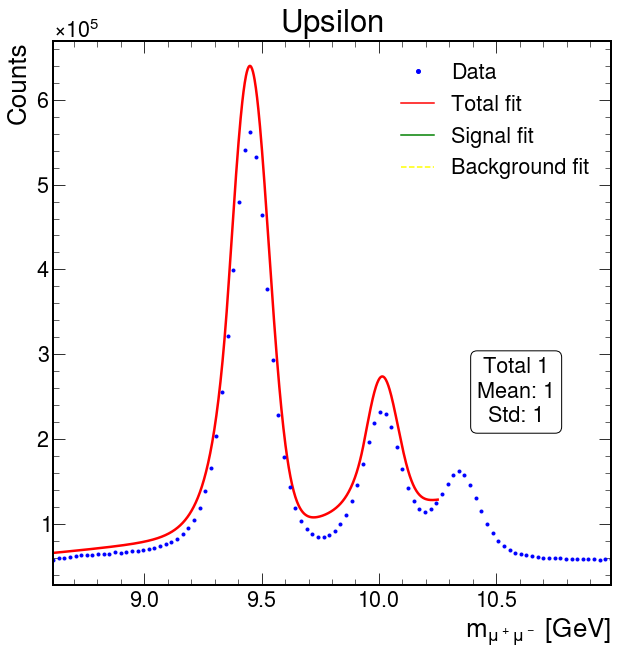

In [7]:
# Plots
#data = histo['Upsilon_mass'].values().get(())
h = histo['Upsilon_mass']

plt.figure()
plt.title("$Upsilon$")

# plot the data
ax = plt.gca()

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)

ax.set_xlim(np.amin(h.axes()[0].centers()), np.amax(h.axes()[0].centers()))
    
ax.set_xlabel(h.axes()[0].label, loc='right')
ax.set_ylabel("Counts", loc='top')

plt.errorbar(h.axes()[0].centers(),
             h.values().get(()),
             yerr=np.sqrt(h.values().get(())),
             fmt='.',
             color='blue',)

"""
annotation = f"Total {np.sum(h.values().get(()))}" \
               + "\n" + f"Mean: {round(result.params[mu].get('value'),3)}" \
               + "\n" + f"Std: {round(result.params[sigma].get('value'),3)}"
"""

annotation = f"Total {1}" \
               + "\n" + f"Mean: {round(1,3)}" \
               + "\n" + f"Std: {round(1,3)}"


ax.annotate(annotation, xy=(0.83, 0.30), xycoords='axes fraction', fontsize = "small",
               ha='center', annotation_clip=False, bbox=dict(boxstyle='round', fc='None')) 
fig = ax.get_figure()

# Legend
data_legend = mlines.Line2D([], [], color='blue', marker='.',
                          markersize=8, linestyle='none', label='Data')
model_legend = mlines.Line2D([], [], color='red', label='Total fit')
signal_legend = mlines.Line2D([], [], color='green', label='Signal fit')
background_legend = mlines.Line2D([], [], color='yellow', label='Background fit', linestyle='--')

plt.legend(handles=[data_legend, model_legend, signal_legend, background_legend])

###### Values
"""
sigmaY1.set_value(0.0797)
sigmaY2.set_value(0.06)
sigmaY3.set_value(0.07)
cryst_ball_yieldY1.set_value(4877446)
cryst_ball_yieldY2.set_value(1096001)
cryst_ball_yieldY3.set_value(1148383)
background_yield.set_value(6783708)
lambd.set_value(0.41)

alpha.set_value(1.296518)
n_sig.set_value(2)
"""
"""
n_sig.set_value(50)
cryst_ball_yieldY2.set_value(1090001)
alpha.set_value(1.296518)
sigmaY1.set_value(0.0797)
lambd.set_value(0.39)

"""

# Creates an array to plot the pdf values

# Model pdf
x_model = np.linspace(8.5, 10.25, 1000)
#y_model = model.pdf(x_model).numpy()

y_model = model.pdf(x_model).numpy()



# Signal pdf
#y_signal = gauss_ext.pdf(x_model).numpy()
# Background pdf
#y_back = background_ext.pdf(x_model).numpy()

# Take a guess 
n_sample = len(mass_data)
n_bins = 68
# Scale for the plot
plot_scaling = n_sample / n_bins * obs.area()

# Model plot
plt.plot(x_model, y_model*plot_scaling , color='red', label="Model", linewidth=2.5)

In [ ]:
plot_scaling = n_sample / n_bins * obs.area()
plot_scaling

In [ ]:
sigmaY1.read_value().numpy()

In [ ]:
a.numpy()